# Previsão de Churn

***
## 3. Pipeline de Data Science - Treino e Teste

### Objetivo:
- Separar dados em treino, teste e validação
- Definir métrica de avaliação
- Comparar resultados de diferentes modelos
- Salvar melhor modelo em pickle para posterior inferência

****
### Inputação dos dados


In [49]:
# Bibliotecas
import pandas as pd
import numpy as np

In [50]:
# Buscar dados do arquivo CSV
csv_file = "../data/03_primary/data_input_model.csv"
df = pd.read_csv(csv_file)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Salary_per_Age,CreditScore_per_Products,CreditScore_per_Salary,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0.220105,0.694444,0.000070,1
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0.250380,0.679894,0.000058,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0.247435,0.097002,0.000042,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,0.219443,0.337963,0.000092,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0.167752,1.000000,0.000146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0,0.225160,0.385582,0.000101,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0,0.265045,0.558201,0.000053,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0.106621,0.813492,0.000245,1
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0,0.201729,0.386243,0.000106,1


In [51]:
# Separando as variaveis independentes e dependentes
y = df['Exited']

X = df.copy()
X = df.drop(columns='Exited')

X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Salary_per_Age,CreditScore_per_Products,CreditScore_per_Salary
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0.220105,0.694444,0.000070
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0.250380,0.679894,0.000058
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0.247435,0.097002,0.000042
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0,0.219443,0.337963,0.000092
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0.167752,1.000000,0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,1,0,0,0.225160,0.385582,0.000101
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,1,0,0,0.265045,0.558201,0.000053
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0,0.106621,0.813492,0.000245
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,0,1,0,0.201729,0.386243,0.000106


***
# Treino e Teste

- Após o pré processamento, o conjunto de dados está pronto para a modelagem.
- Prever o Churn de clientes é um problema de **CLASSIFICAÇÃO** binária, 1 se Churn e 0 caso contrário.

Será feita uma comparação entre os algoritmos:
- Regressão Logística
- KNN
- Random Forest
- XGBost

Para cada um dos algoritmos será executada uma etapa de tunning dos hiperparâmetros utilizando GridSearch.

Para esse tipo de problema, onde os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos, será adotada como principal métrica de otimização o **Precision**.
Também será utilizada para avaliação dos a Curva ROC. 

### Separação entre treino e teste

In [52]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)

x_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Salary_per_Age,CreditScore_per_Products,CreditScore_per_Salary
9069,0.538,0,0.189189,0.4,0.699113,0.333333,1,1,0.863987,0,0,1,0.492562,0.285053,0.000029
2603,0.586,0,0.216216,0.7,0.639407,0.000000,0,1,0.942698,0,1,0,0.505819,0.726190,0.000026
7738,0.422,1,0.202703,0.6,0.000000,0.333333,0,0,0.868427,1,0,0,0.480090,0.246693,0.000023
1579,0.536,1,0.310811,0.8,0.150271,0.000000,1,1,0.978913,0,1,0,0.435570,0.693122,0.000022
5058,0.728,1,0.256757,0.9,0.591742,0.333333,0,1,0.756419,1,0,0,0.372960,0.347884,0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.836,1,0.486486,0.8,0.277853,0.000000,1,1,0.346880,1,0,0,0.117184,0.891534,0.000151
5191,0.664,0,0.540541,0.1,0.000000,0.000000,1,1,0.003475,1,0,0,0.001088,0.777778,0.015737
5390,0.770,0,0.270270,0.1,0.000000,0.666667,0,0,0.461087,1,0,0,0.221362,0.199735,0.000100
860,0.634,1,0.337838,0.8,0.758186,0.000000,1,0,0.487529,1,0,0,0.206838,0.757937,0.000082


***
## Regressão Logistica

A regressão logística é um algoritmo de aprendizado de máquina usado para resolver problemas de classificação binária, onde o objetivo é prever uma classe entre duas categorias possíveis.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define o range dos parâmetros a serem testados
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'solver' : ['lbfgs','liblinear'],
    'max_iter' : [100, 500]
    }
]

# Cria o modelo KNN
model = LogisticRegression()

# Cria o objeto GridSearchCV para realizar a busca pelos melhores parâmetros
print("Executando GridSearch...")
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='precision') 

# Ajusta o modelo aos dados de treinamento
grid_search.fit(x_train, y_train)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)


Executando GridSearch...
Melhores parâmetros: {'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\Fabio\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Fabio\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Fabio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Fabio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

In [31]:
# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [27]:
from sklearn.linear_model import LogisticRegression

best_params_rl = {'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

rl_model = LogisticRegression(**best_params_rl)
rl_model = rl_model.fit(x_train, y_train)

Os coeficientes para cada variável da Regressão Logística ajudam na interpretabilidade, o que permite entender o impacto relativo de cada variável na previsão de churn. Isso ajuda a identificar quais variáveis estão mais associadas ao churn.

Da tabela abaixo, nota-se que CreditScore_per_Products	(7.59), NumOfProducts (7.4) e Age (3.89) são diretamente relacionadas à probabilidade de churn, e Salary_per_Age (-2.66) e CreditScore (-4.3) são inversamente relacionadas à probabilidade de churn.

In [47]:
# Coeficientes da Regressão Logistica - transposição, renomeação e ordenação
rl_coeffs = pd.DataFrame(rl_model.coef_, columns=x_train.columns).T.rename(columns={0:'Coeficiente'}).sort_values('Coeficiente', ascending=False)
rl_coeffs

,Coeficiente
CreditScore_per_Products,7.591384
NumOfProducts,7.423766
Age,3.893776
EstimatedSalary,1.215406
Geography_Germany,0.529861
Balance,0.191191
CreditScore_per_Salary,-0.026917
HasCrCard,-0.072453
Geography_Spain,-0.203069
Tenure,-0.232713


In [28]:
# Definindo função para gerar e plotar Matriz de Confusão

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# matriz de confusão
def matriz_confusao(model, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=model.classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()


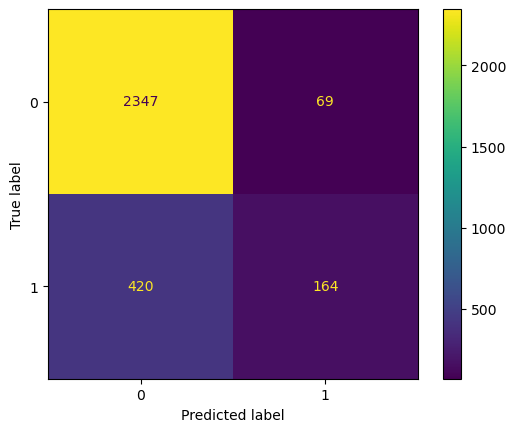

In [29]:
y_pred_rl = rl_model.predict(x_test)
matriz_confusao(rl_model, y_test, y_pred_rl)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_rl))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2416
           1       0.70      0.28      0.40       584

    accuracy                           0.84      3000
   macro avg       0.78      0.63      0.65      3000
weighted avg       0.82      0.84      0.81      3000



In [33]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score
)

# Avalia o modelo nos dados de teste
accuracy = accuracy_score(y_test, y_pred_rl)
print("Acurácia: ", round(accuracy, 2))

precision = precision_score(y_test, y_pred_rl)
print("Precision:", round(precision, 2))

recall = recall_score(y_test, y_pred_rl)
print("Recall:   ", round(recall, 2))

Acurácia:  0.84
Precision: 0.7
Recall:    0.28


## KNN 

KNN ou 'k-vizinhos mais próximo' utiliza como base para prever as classes, os vizinhos mais próximo, ou seja, as observações mais próximas serão a base para prever essa nova observação.


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define o range dos parâmetros a serem testados
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# Cria o modelo KNN
model = KNeighborsClassifier()

# Cria o objeto GridSearchCV para realizar a busca pelos melhores parâmetros
print("Executando GridSearch...")
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='precision') 

# Ajusta o modelo aos dados de treinamento
grid_search.fit(x_train, y_train)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)


Executando GridSearch...
Melhores parâmetros: {'n_neighbors': 8}


In [67]:
from sklearn.neighbors import KNeighborsClassifier

# Fit com os melhores parametros
print("Fitando com melhores parametros...")

# Melhores parametros encontrados pelo GridSearch acima
best_params_knn = {'n_neighbors': 8}
knn_model = KNeighborsClassifier(**best_params_knn)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

# Avalia o modelo nos dados de teste
accuracy = accuracy_score(y_test, y_pred_knn)
print("Acurácia: ", round(accuracy, 2))

precision = precision_score(y_test, y_pred_knn)
print("Precision:", round(precision, 2))

recall = recall_score(y_test, y_pred_knn)
print("Recall:   ", round(recall, 2))

Fitando com melhores parametros...
Acurácia:  0.82
Precision: 0.62
Recall:    0.2


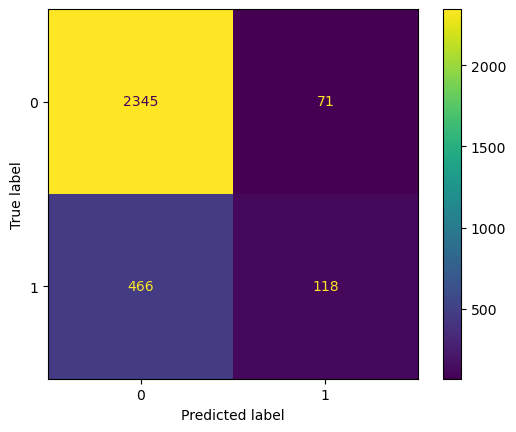

In [68]:
matriz_confusao(knn_model, y_test, y_pred_knn)

#### Método Elbow

A otimização acima foi realizada por meio do GridSearch.

Farei agora a verificação da otimização utilizando Método Elbow.

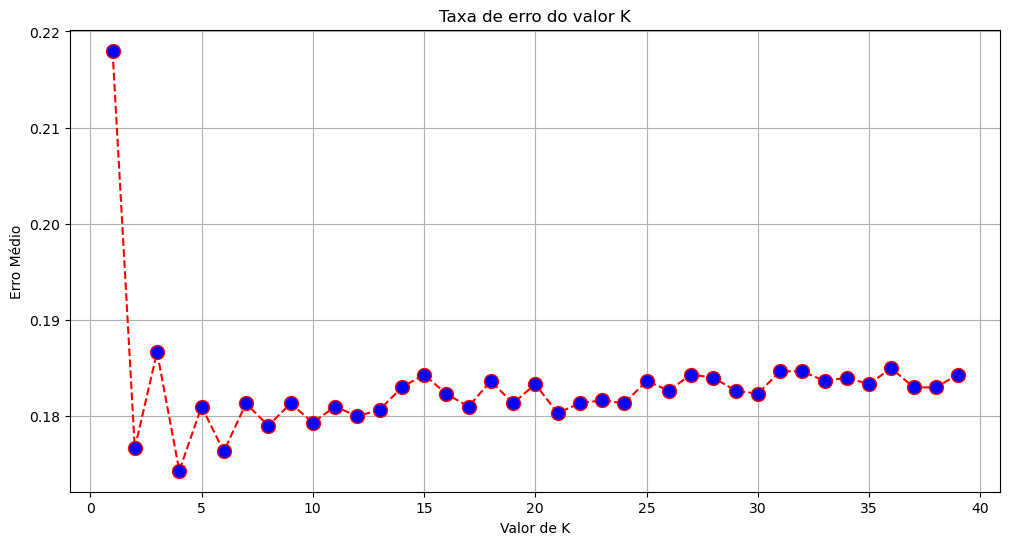

In [9]:
import matplotlib.pyplot as plt

error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')
plt.grid()
plt.show()

Para determinar o número ideal de clusters, temos que selecionar o valor de k no "cotovelo", ou seja, o ponto após o qual a distorção começa a diminuir de forma linear. Assim, para os dados fornecidos, concluímos que o número ideal de clusters para os dados é 2.

In [10]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

* **Previsão na amostra teste e matriz de confusão**

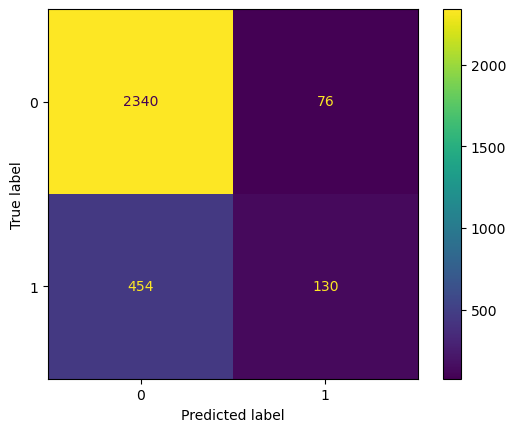

In [11]:
y_pred_knn_elbow = knn.predict(x_test)

matriz_confusao(knn_model, y_test, y_pred_knn_elbow)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_knn_elbow))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2416
           1       0.63      0.22      0.33       584

    accuracy                           0.82      3000
   macro avg       0.73      0.60      0.61      3000
weighted avg       0.80      0.82      0.79      3000



In [13]:
# Avalia o modelo nos dados de teste
accuracy = accuracy_score(y_test, y_pred_knn_elbow)
print("Acurácia: ", round(accuracy, 2))

precision = precision_score(y_test, y_pred_knn_elbow)
print("Precision:", round(precision, 2))

recall = recall_score(y_test, y_pred_knn_elbow)
print("Recall:   ", round(recall, 2))

Acurácia:  0.82
Precision: 0.63
Recall:    0.22


Nota-se que os métodos de otimização chegaram em valores próximos de K e apresentaram resultados próximos.

Observa-se que apesar de estar classificando bem os clientes que não deram Churn (classe 0) há muitos falsos negativos no modelo (quando o modelo prevê 0, mas o correto seria 1). Ou seja, o modelo não consegue prever bem o Churn, que é o objetivo principal na análise.

## Random Forest

In [14]:
# Importe o modelo que estamos usando 
from sklearn.ensemble import RandomForestClassifier

# Define o range dos parâmetros a serem testados
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [8, 10],
    'criterion': ['gini', 'entropy']
}

# Cria o modelo RandomForest
model = RandomForestClassifier()

# Cria o objeto GridSearchCV para realizar a busca pelos melhores parâmetros
print("Executando GridSearch...")
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='precision')

# Ajusta o modelo aos dados de treinamento
grid_search.fit(x_train, y_train)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)


Executando GridSearch...
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}


In [53]:
from sklearn.ensemble import RandomForestClassifier

# Melhores parametros encontrados pelo GridSearch acima
best_params_rf = {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}

# Fit com os melhores parametros
print("Fitando com melhores parametros...")

rf_model = RandomForestClassifier(**best_params_rf)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

# Avalia o modelo nos dados de teste
accuracy = accuracy_score(y_test, y_pred_rf)
print("Acurácia: ", round(accuracy, 2))

precision = precision_score(y_test, y_pred_rf)
print("Precision:", round(precision, 2))

recall = recall_score(y_test, y_pred_rf)
print("Recall:   ", round(recall, 2))

Fitando com melhores parametros...
Acurácia:  0.87
Precision: 0.82
Recall:    0.42


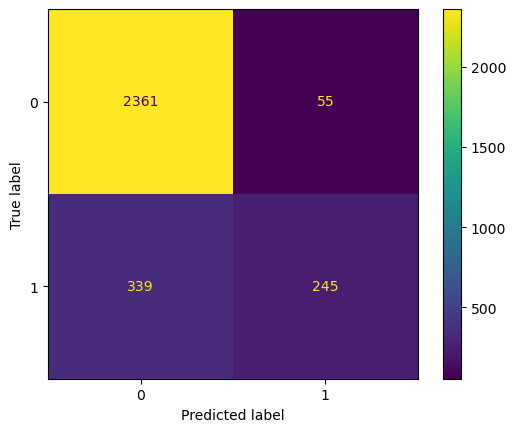

In [54]:
matriz_confusao(rf_model, y_test, y_pred_rf)

O modelo de Random Forest conseguiu melhores resultados, porém ainda temos bastante falsos negativos. Vamos tentar um modelo mais robusto e que não sofre tanta influência em amostras desbalanceada.

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.42      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [56]:
# Analisando a importância de cada variável
rf_model.feature_importances_

feature_importances = pd.DataFrame(rf_model.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Age,0.277743
NumOfProducts,0.178374
CreditScore_per_Products,0.142411
IsActiveMember,0.069751
Balance,0.064833
Salary_per_Age,0.052989
Geography_Germany,0.042022
EstimatedSalary,0.040438
CreditScore,0.039760
CreditScore_per_Salary,0.038201


# XGBoost


In [19]:
#Importando as bibliotecas necessárias
from xgboost import XGBClassifier

# Define o range dos parâmetros a serem testados
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Cria o modelo XGBoost
model = XGBClassifier()

# Cria o objeto GridSearchCV para realizar a busca pelos melhores parâmetros
print("Executando GridSearch...")
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='precision') 

# Ajusta o modelo aos dados de treinamento
grid_search.fit(x_train, y_train)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)


Executando GridSearch...
Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [58]:
from xgboost import XGBClassifier

# Melhores parametros encontrados pelo GridSearch
best_params_xgb = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

# Fit com os melhores parametros
print("Fitando com melhores parametros...")

xgb_model = XGBClassifier(**best_params_xgb)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

# Avalia o modelo nos dados de teste
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Acurácia: ", round(accuracy, 2))

precision = precision_score(y_test, y_pred_xgb)
print("Precision:", round(precision, 2))

recall = recall_score(y_test, y_pred_xgb)
print("Recall:   ", round(recall, 2))

Fitando com melhores parametros...
Acurácia:  0.86
Precision: 0.78
Recall:    0.4


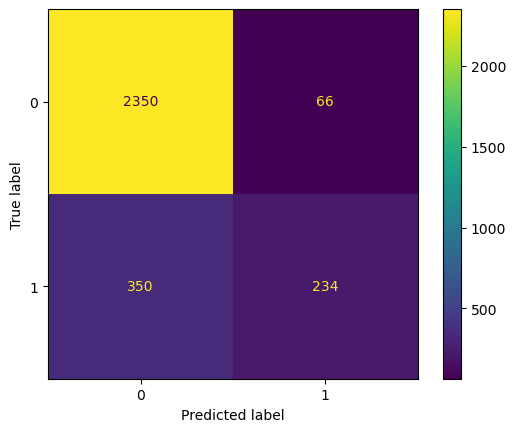

In [59]:
matriz_confusao(xgb_model, y_test, y_pred_xgb)

In [60]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.78      0.40      0.53       584

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.72      3000
weighted avg       0.85      0.86      0.84      3000



Usando tanto o RandomForest quanto o XGBoost alcançamos uma acurácia de 87%.

Abaixo seguiremos com um Ensemble usando esses dois modelos.


**Analisando a importância das variáveis:**


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

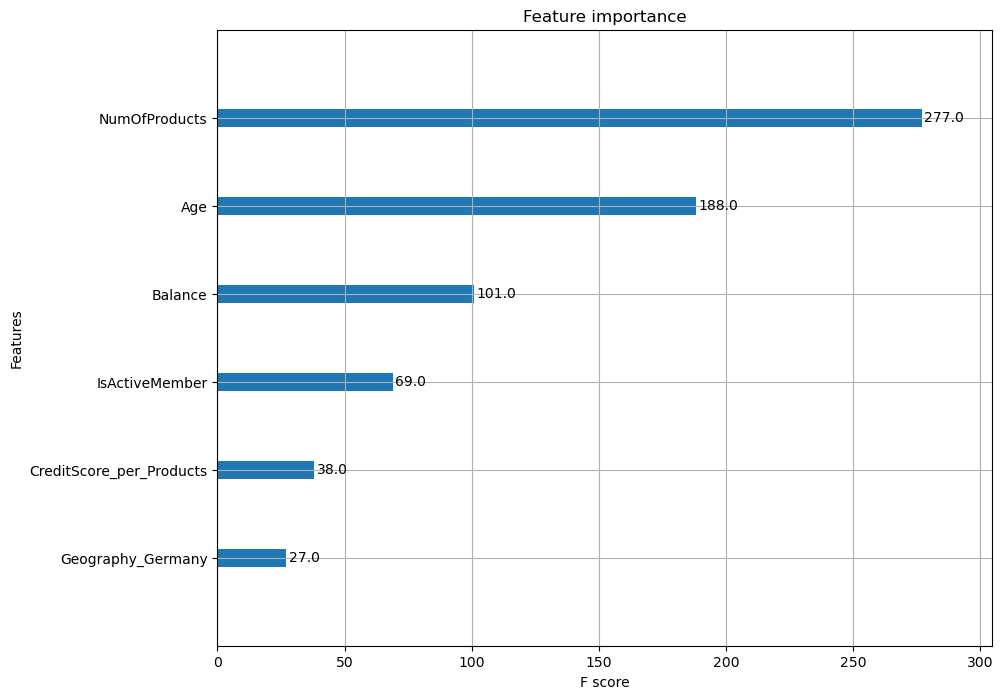

In [61]:
# Analisando a importância de cada variável
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

As variáveis mais importante para prever o Churn dos clientes foram: 
- idade
- saldo bancário
- número de produtos
- pontuação de crédito
- estimativa de salário
- membro ativo
- país


***
#### Curva ROC

A curva ROC (Receiver Operating Characteristic) é uma representação gráfica da performance de um modelo de classificação binária em diferentes limiares de classificação. A interpretação da curva ROC envolve analisar o trade-off entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade).

Algumas considerações importantes ao interpretar a curva ROC:

- Quanto mais próximo a curva ROC estiver do canto superior esquerdo do gráfico, melhor será o desempenho do modelo, indicando uma maior capacidade de distinguir entre as classes positiva e negativa.
- A diagonal da curva ROC representa o desempenho de um classificador aleatório, onde a taxa de verdadeiros positivos é igual à taxa de falsos positivos. Portanto, qualquer modelo que esteja acima dessa diagonal é considerado melhor do que um classificador aleatório.
- Quanto maior a área sob a curva ROC (AUC-ROC), melhor o desempenho do modelo. A AUC-ROC varia de 0 a 1, sendo que um valor de 0,5 indica um modelo que possui um desempenho equivalente ao acaso, e um valor próximo de 1 indica um modelo com alta capacidade de discriminação entre as classes.


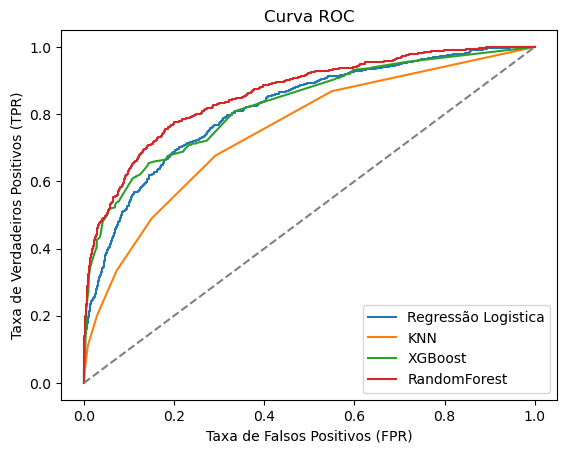

AUC-ROC:
	RL:  0.82
	KNN:  0.75
	XGB:  0.83
	RF:  0.86


In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtém as probabilidades preditas do modelo
prob_rl = rl_model.predict_proba(x_test)[:, 1]
prob_knn = knn_model.predict_proba(x_test)[:, 1]
prob_xgb = xgb_model.predict_proba(x_test)[:, 1]
prob_rf = rf_model.predict_proba(x_test)[:, 1]

# Calcula o FPR, TPR e os limiares
fpr_rl, tpr_rl, thresholds_rl = roc_curve(y_test, prob_rl)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, prob_knn)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, prob_xgb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prob_rf)

# Plota as curvas ROC
plt.plot(fpr_rl, tpr_rl, label='Regressão Logistica')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_rf, tpr_rf, label='RandomForest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reta diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calcula a AUC-ROC
auc_roc_rl = roc_auc_score(y_test, prob_rl)
auc_roc_knn = roc_auc_score(y_test, prob_knn)
auc_roc_xgb = roc_auc_score(y_test, prob_xgb)
auc_roc_rf = roc_auc_score(y_test, prob_rf)

print('AUC-ROC:')
print('\tRL: ', round(auc_roc_rl, 2))
print('\tKNN: ', round(auc_roc_knn, 2))
print('\tXGB: ', round(auc_roc_xgb, 2))
print('\tRF: ', round(auc_roc_rf, 2))

***
## Avaliação dos Resultados

Relembrando os resultados anteriores:

- Regressão Logística:
    - Acurácia:  0.84
    - Precision: 0.7
    - Recall:    0.28
- KNN:
    - Acurácia:  0.82
    - Precision: 0.63
    - Recall:    0.22
- RandomForest:
    - Acurácia:  0.87
    - Precision: 0.82
    - Recall:    0.42
- XGBoost:
    - Acurácia:  0.86
    - Precision: 0.78
    - Recall:    0.4


Partindo das métricas **Acurácia** e **Precision** e a **Curva ROC**, gostaria de destacar os seguintes pontos:
- Dentre os algoritmos mais simples e com baixo demanda computacional (RL e KNN), destaco a superioridade da Regressão Logística sobre o KNN.
- Como os dados não demandam muito recurso computacional, e pela superioridade nos resultados e interpretabilidade, opto por prosseguir com o **RandomForest** por apresentar resultado satisfatório e superior aos demais. 

***
### Análise das features do modelo

Apesar da escolha do modelo ter sido pelo RandomForest, a titulo de representação, apresento abaixo o shap com a contribuição de cada variável no processo decisório do modelo.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


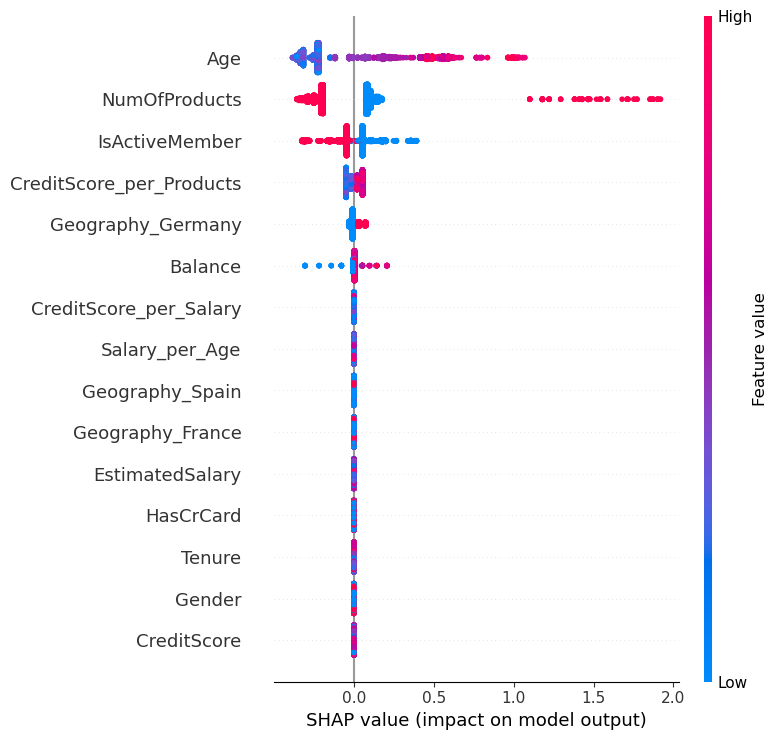

In [28]:
import shap

# Análise das features do modelo
shap_values_total = shap.TreeExplainer(xgb_model).shap_values(x_test)
shap.summary_plot(shap_values_total, x_test)#, plot_type="bar")

In [29]:
explainer = shap.TreeExplainer(xgb_model)
expected_value = explainer.expected_value
shap_values = explainer.shap_values(x_test)

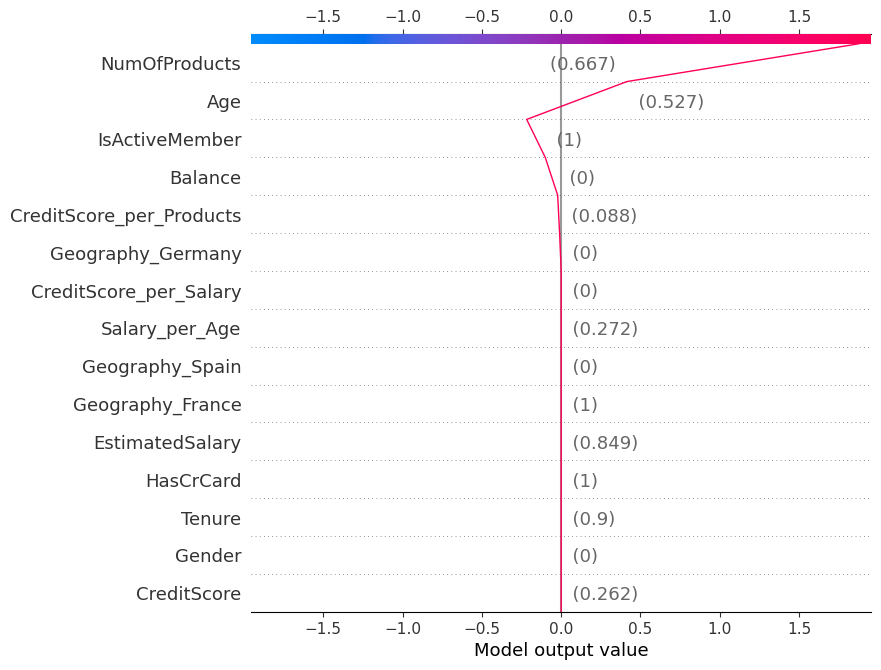

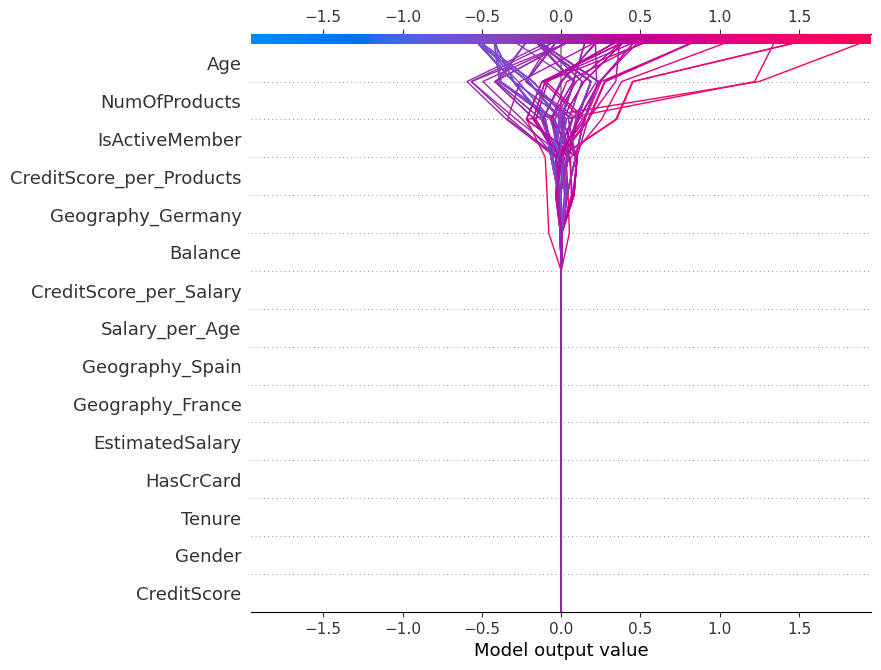

In [30]:
# Setar amostra para visualizar o grafico
amostra = 10
shap.decision_plot(expected_value, shap_values[amostra], x_test.iloc[amostra])
shap.decision_plot(expected_value, shap_values[:100], x_test.iloc[:100])

In [35]:
feature_importances = xgb_model.feature_importances_
feature_names = X.columns.tolist()

sorted_features = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

cumsum = 0
idx = 0
for name, importance in sorted_features:
    cumsum += importance
    if cumsum <= 1:
        idx += 1
        print(f"{idx} - {name}: \t{round(importance*100, 2)} %")
    else:
        break

1 - Age: 	36.6 %
2 - IsActiveMember: 	26.87 %
3 - NumOfProducts: 	18.82 %
4 - Geography_Germany: 	10.11 %
5 - CreditScore_per_Products: 	5.81 %


****
## Armazena modelo

In [39]:
import pickle

# Salvando o modelo em um arquivo pickle
with open('../data/06_models/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

***
# Prós e Contras

Algumas vantagens e desvantagens de cada algoritmo:

### Regressão Logística:
- Prós:

- Contras:

### K-Nearest Neighbors (KNN):
- Prós:
    - Simples de entender e implementar.
    - Não faz suposições sobre a distribuição dos dados.
    - Pode ser eficaz para conjuntos de dados pequenos.
    - Pode lidar bem com classes desbalanceadas.
- Contras:
    - Sensível a outliers.
    - Pode ser afetado negativamente pela alta dimensionalidade dos dados.
    - Pode ser computacionalmente caro para prever, especialmente em grandes conjuntos de dados - não foi o caso para essa base.

### Random Forest:
- Prós:
    - Lida bem com dados desbalanceados e variáveis categóricas.
    - Tende a evitar overfitting devido à combinação de múltiplas árvores.
    - Pode lidar com grande quantidade de recursos.
    - Geralmente fornece bons resultados com pouca sintonia de hiperparâmetros.
- Contras:
    - Pode ser lento para treinar e prever, especialmente em conjuntos de dados grandes - não foi o caso para essa base.

### XGBoost:
- Prós:
    - Altamente eficaz para classificação e regressão.
    - Lida bem com dados desbalanceados.
    - Rápido e eficiente em termos de uso de recursos - o mais rápido dentre os 3 testados.
- Contras:
    - Pode requerer mais ajustes de hiperparâmetros para otimizar o desempenho.
    - Pode ser sensível a outliers.

***
# Conclusão

Melhores modelos para esse caso: XGBost e Random Forest. Pela ligeira vantagem, foi adotado o Random Forest.

Variáveis mais importante: idade do cliente, se ele está ativo e a quantidade de produtos.

Por fim, o modelo foi salvo para posterior inferência da base de teste do Case.